# Exploratory Analysis

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import re
from datetime import datetime
import json
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Import dataset 
private_data = "../datasets/cleaned/cleaned_private.csv"

df = pd.read_csv(private_data, quotechar='"', escapechar='\\', thousands=',')

In [3]:
# remove outlier function
def removeoutlier(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    clean = series[~outliers]
    clean = pd.DataFrame(clean)
    return clean

## Uni-Variate Analysis

### Housing Price Distribution
- Housing prices can be analysed both as Price Per Unit and Price Per Square Foot.

In [4]:
# Summary statistics of Price Per Unit
pd.set_option('display.float_format', '{:,.4f}'.format)
unitprice = pd.DataFrame(df['Price'])
removeoutlier(unitprice).describe()

,Price
count,"118,326.0000"
mean,"1,652,538.4691"
std,"700,379.8847"
min,"320,000.0000"
25%,"1,153,800.0000"
50%,"1,497,000.0000"
75%,"1,995,672.0000"
max,"3,822,000.0000"


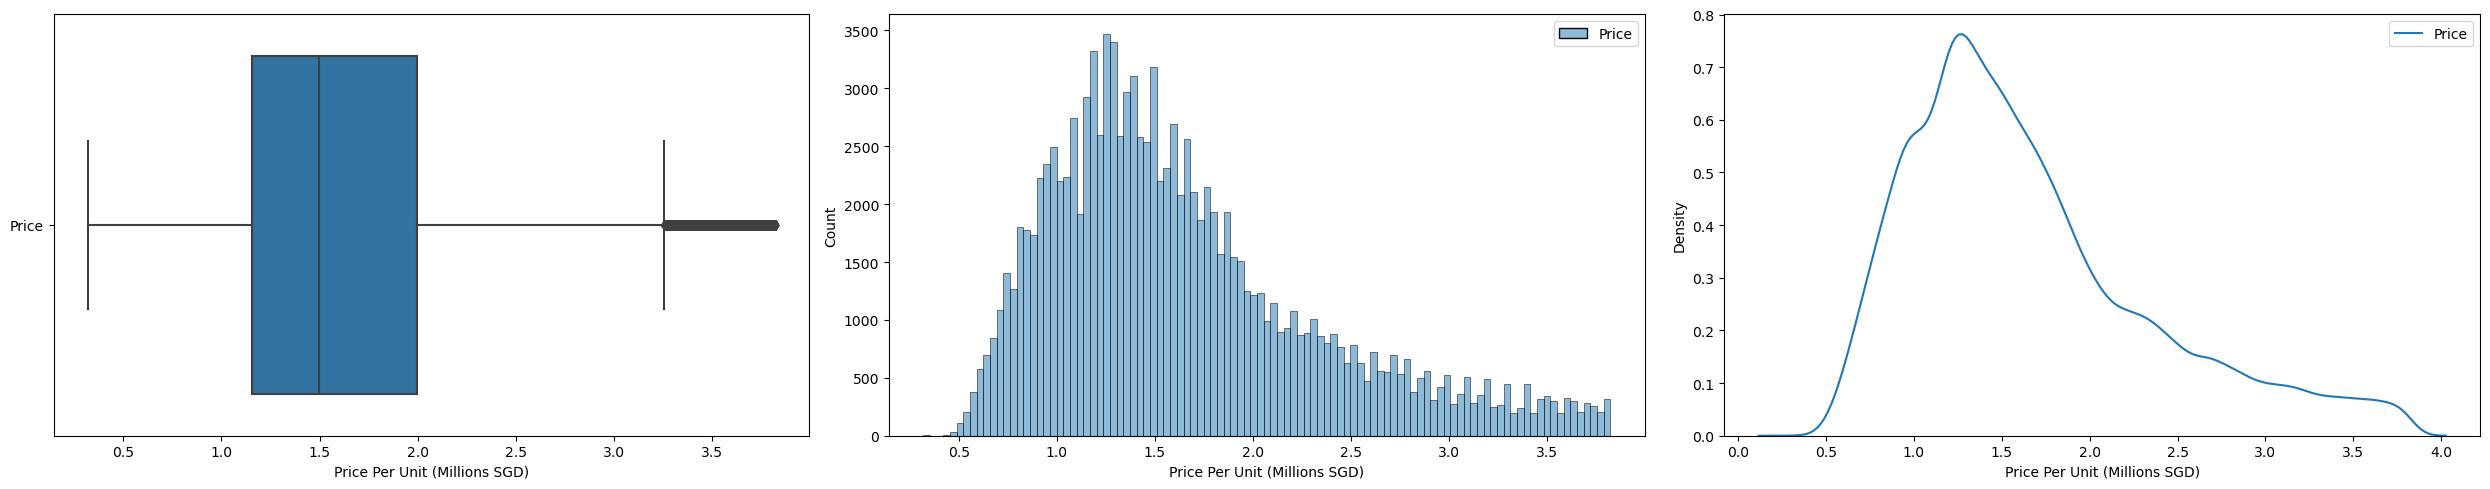

In [5]:
# Prepare your data in millions
unitprice_million = removeoutlier(unitprice) / 1_000_000

# Plot the basic uni-variate figures for Price Per Unit (in millions)
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data=unitprice_million, orient="h", ax=axes[0])
sb.histplot(data=unitprice_million, ax=axes[1])
sb.kdeplot(data=unitprice_million, ax=axes[2])

# Set x-axis label for all plots
for ax in [axes[0], axes[1], axes[2]]:
    ax.set_xlabel('Price Per Unit (Millions SGD)')

plt.tight_layout()
plt.show()

In [108]:
# Summary statistics of Price Per Square Foot 
psf = pd.DataFrame(df['Unit Price ($ PSF)'])
removeoutlier(psf).describe()

,Unit Price ($ PSF)
count,"127,164.0000"
mean,"1,678.2046"
std,563.1990
min,120.0000
25%,"1,251.0000"
50%,"1,598.0000"
75%,"2,052.0000"
max,"3,294.0000"


<Axes: ylabel='Density'>

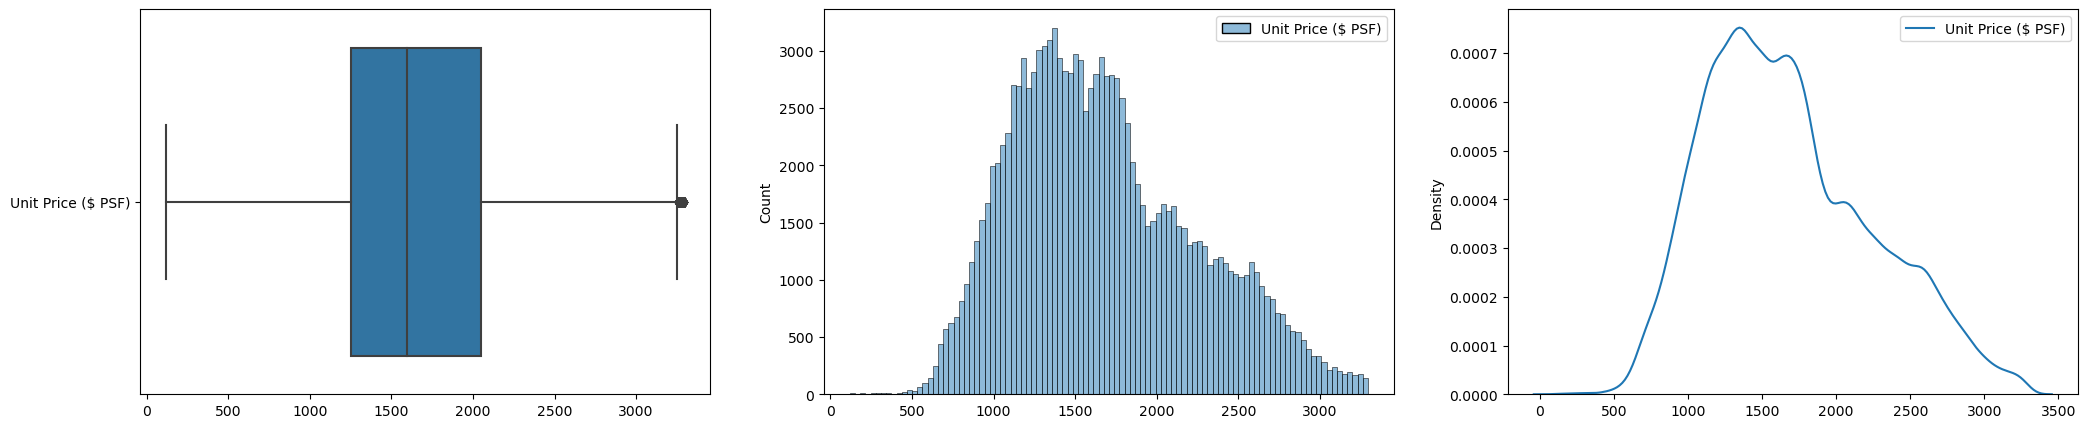

In [109]:
# Plot the basic uni-variate figures for Price Per Square Foot 
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(psf), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(psf), ax = axes[1])
sb.kdeplot(data = removeoutlier(psf), ax = axes[2])

### Numerical Data Analysis

In [111]:
# Summary statistics of Area (SQFT)
area = pd.DataFrame(df['Area (SQFT)'])
removeoutlier(area).describe()

,Area (SQFT)
count,"118,193.0000"
mean,"1,023.4634"
std,385.8534
min,258.3400
25%,721.1900
50%,979.5200
75%,"1,248.6200"
max,"2,238.9100"


<Axes: ylabel='Density'>

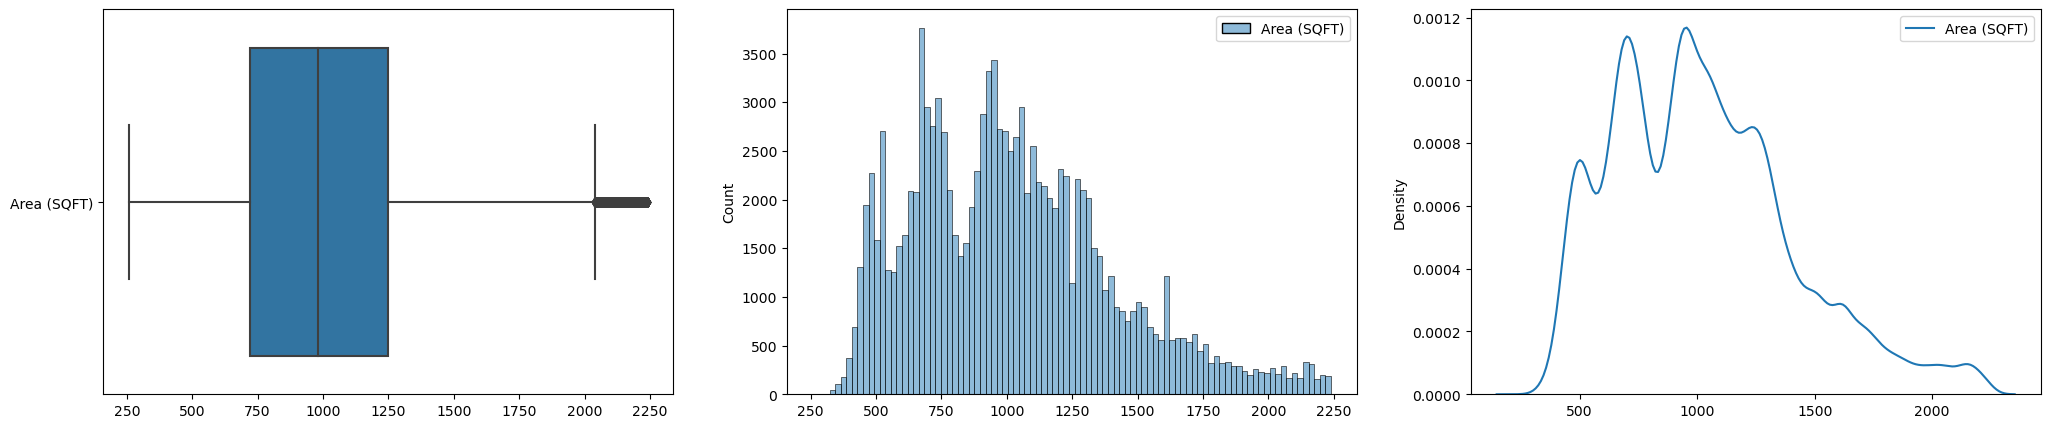

In [112]:
# Plot the basic uni-variate figures for Area (SQFT)
f, axes = plt.subplots(1, 3, figsize=(25, 5))
sb.boxplot(data = removeoutlier(area), orient = "h", ax = axes[0])
sb.histplot(data = removeoutlier(area), ax = axes[1])
sb.kdeplot(data = removeoutlier(area), ax = axes[2])

In [6]:
# Summary statistics of Remaining Lease Years
remainingleaseyears = pd.DataFrame(df['Lease_Category'])
remainingleaseyears.describe()

,Lease_Category
count,128349
unique,11
top,91-100 Years
freq,47878


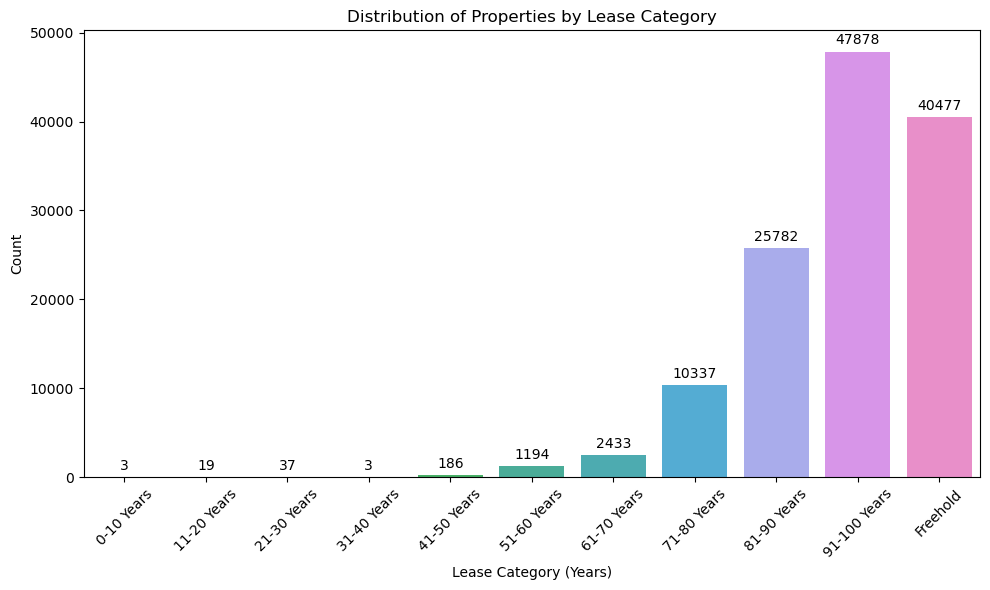

In [11]:
# Plot the basic uni-variate figures for Remaining Lease Years
plt.figure(figsize=(10, 6))
ax = sb.countplot(x='Lease_Category', data=df, order=sorted(df['Lease_Category'].unique()))
plt.xlabel('Lease Category (Years)')
plt.ylabel('Count')
plt.title('Distribution of Properties by Lease Category')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.show()

From the visualisations of the Remaining Lease Years, we can see that 999 years is a significant outlier. Specifically, 87,887 out of the 128,349 data points for remaining lease years range between 10 to 106 years. Therefore, we will exclude the 999 years from the dataset in order to conduct more meaningful numerical data visualizations for the other years.

In [12]:
# # Summary statistics of Remaining Lease Years (Excl. 999yrs)
# remainingleaseyears_nonfreehold = pd.DataFrame(df[df['Remaining Lease Years'] != 999]['Remaining Lease Years'])
# remainingleaseyears_nonfreehold.describe()

In [13]:
# # Plot the basic uni-variate figures for Remaining Lease Years (Excl. 999yrs)
# f, axes = plt.subplots(1, 3, figsize=(25, 5))
# sb.boxplot(data = removeoutlier(remainingleaseyears_nonfreehold), orient = "h", ax = axes[0])
# sb.histplot(data = removeoutlier(remainingleaseyears_nonfreehold), ax=axes[1])
# sb.kdeplot(data = removeoutlier(remainingleaseyears_nonfreehold), ax = axes[2])

### Categorical Data Analysis

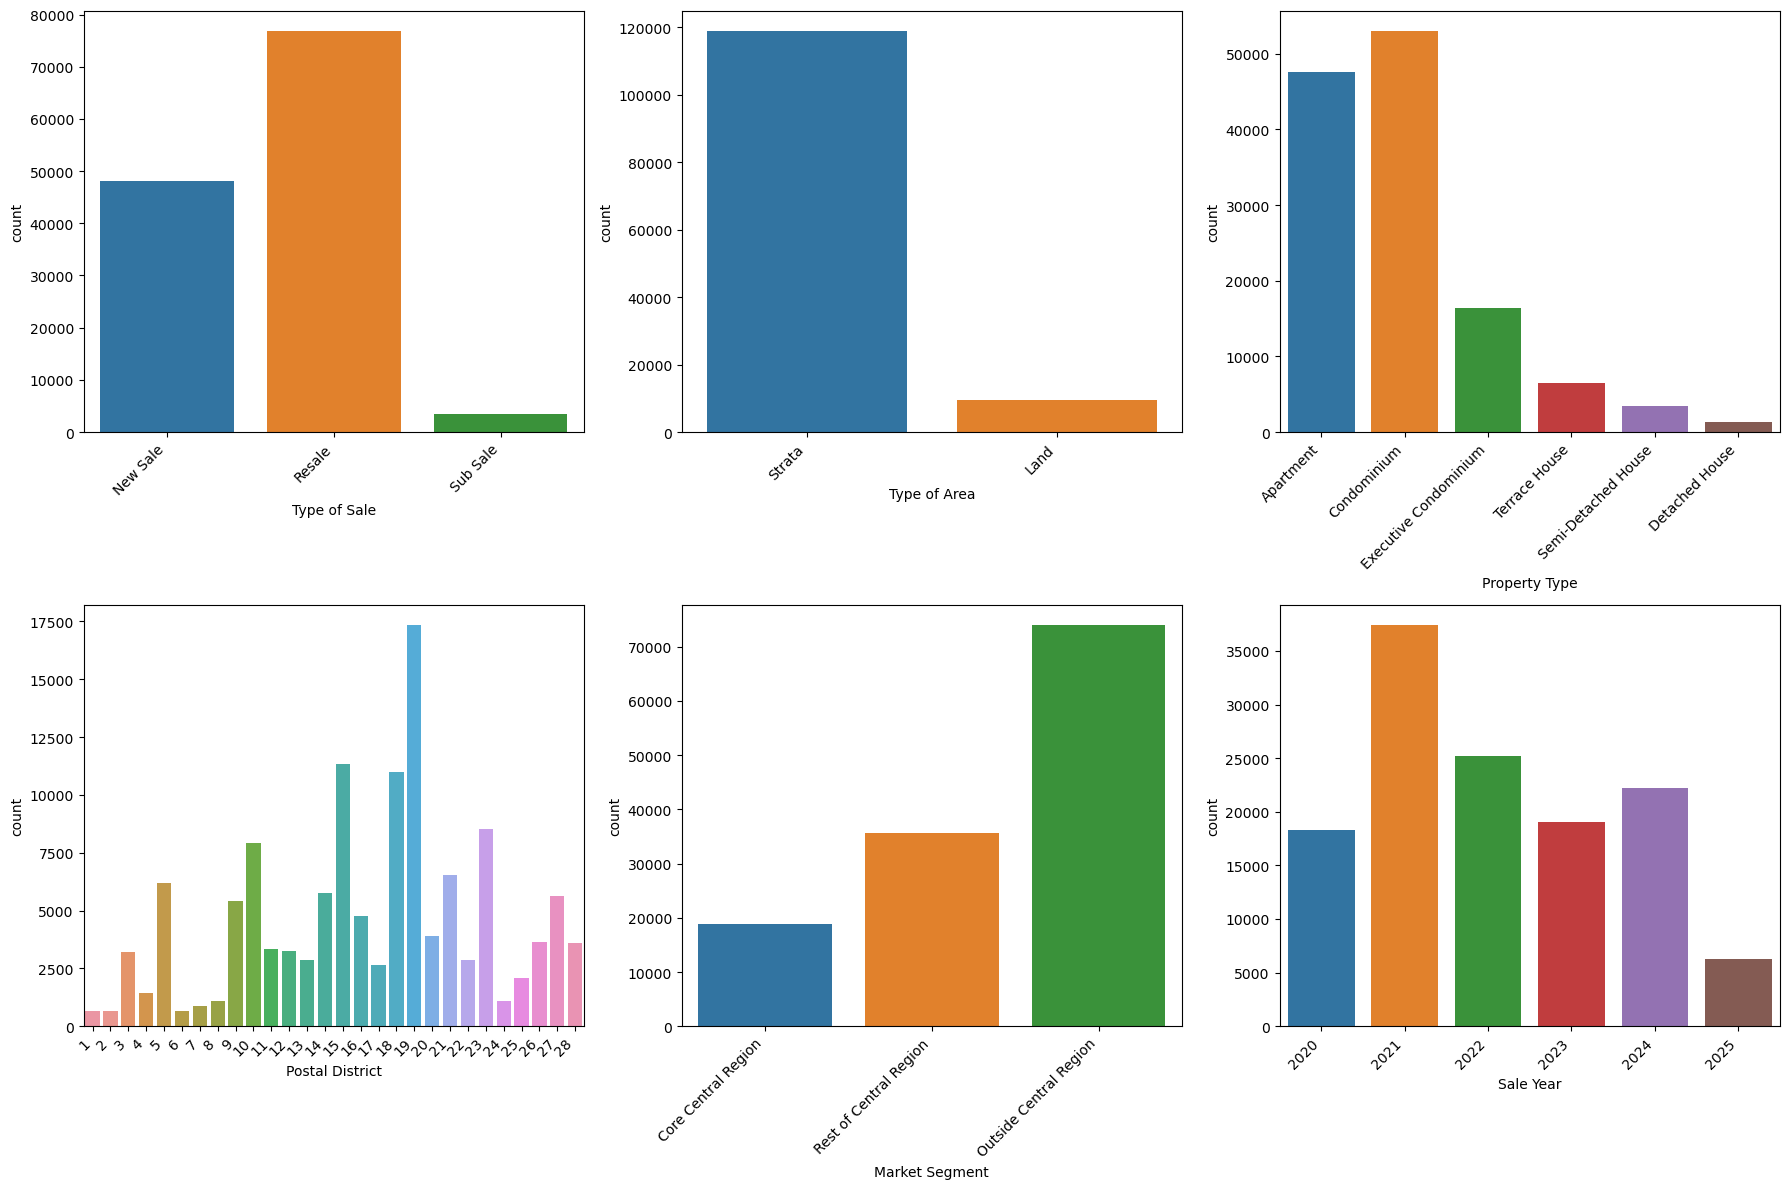

In [119]:
# Extract relevant categorical variables
saletype = pd.DataFrame(df['Type of Sale'])
areatype = pd.DataFrame(df['Type of Area'])
propertytype = pd.DataFrame(df['Property Type'])
postaldistrict = pd.DataFrame(df['Postal District'])
marketsegment = pd.DataFrame(df['Market Segment'])
saleyear = pd.DataFrame(df['Sale Year'])
remainingleaseyears = pd.DataFrame(df['Remaining Lease Years'])

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot count plots for categorical variables
sb.countplot(data=saletype, x='Type of Sale', ax=axes[0, 0])
sb.countplot(data=areatype, x='Type of Area', ax=axes[0, 1])
sb.countplot(data=propertytype, x='Property Type', ax=axes[0, 2])
sb.countplot(data=postaldistrict, x='Postal District', ax=axes[1, 0])
sb.countplot(data=marketsegment, x='Market Segment', ax=axes[1, 1])
sb.countplot(data=saleyear, x='Sale Year', ax=axes[1, 2])

# Rotate x-axis labels for better readability (for variables with many categories)
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


# Bivariate analysis

Price against Area for different property types

c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

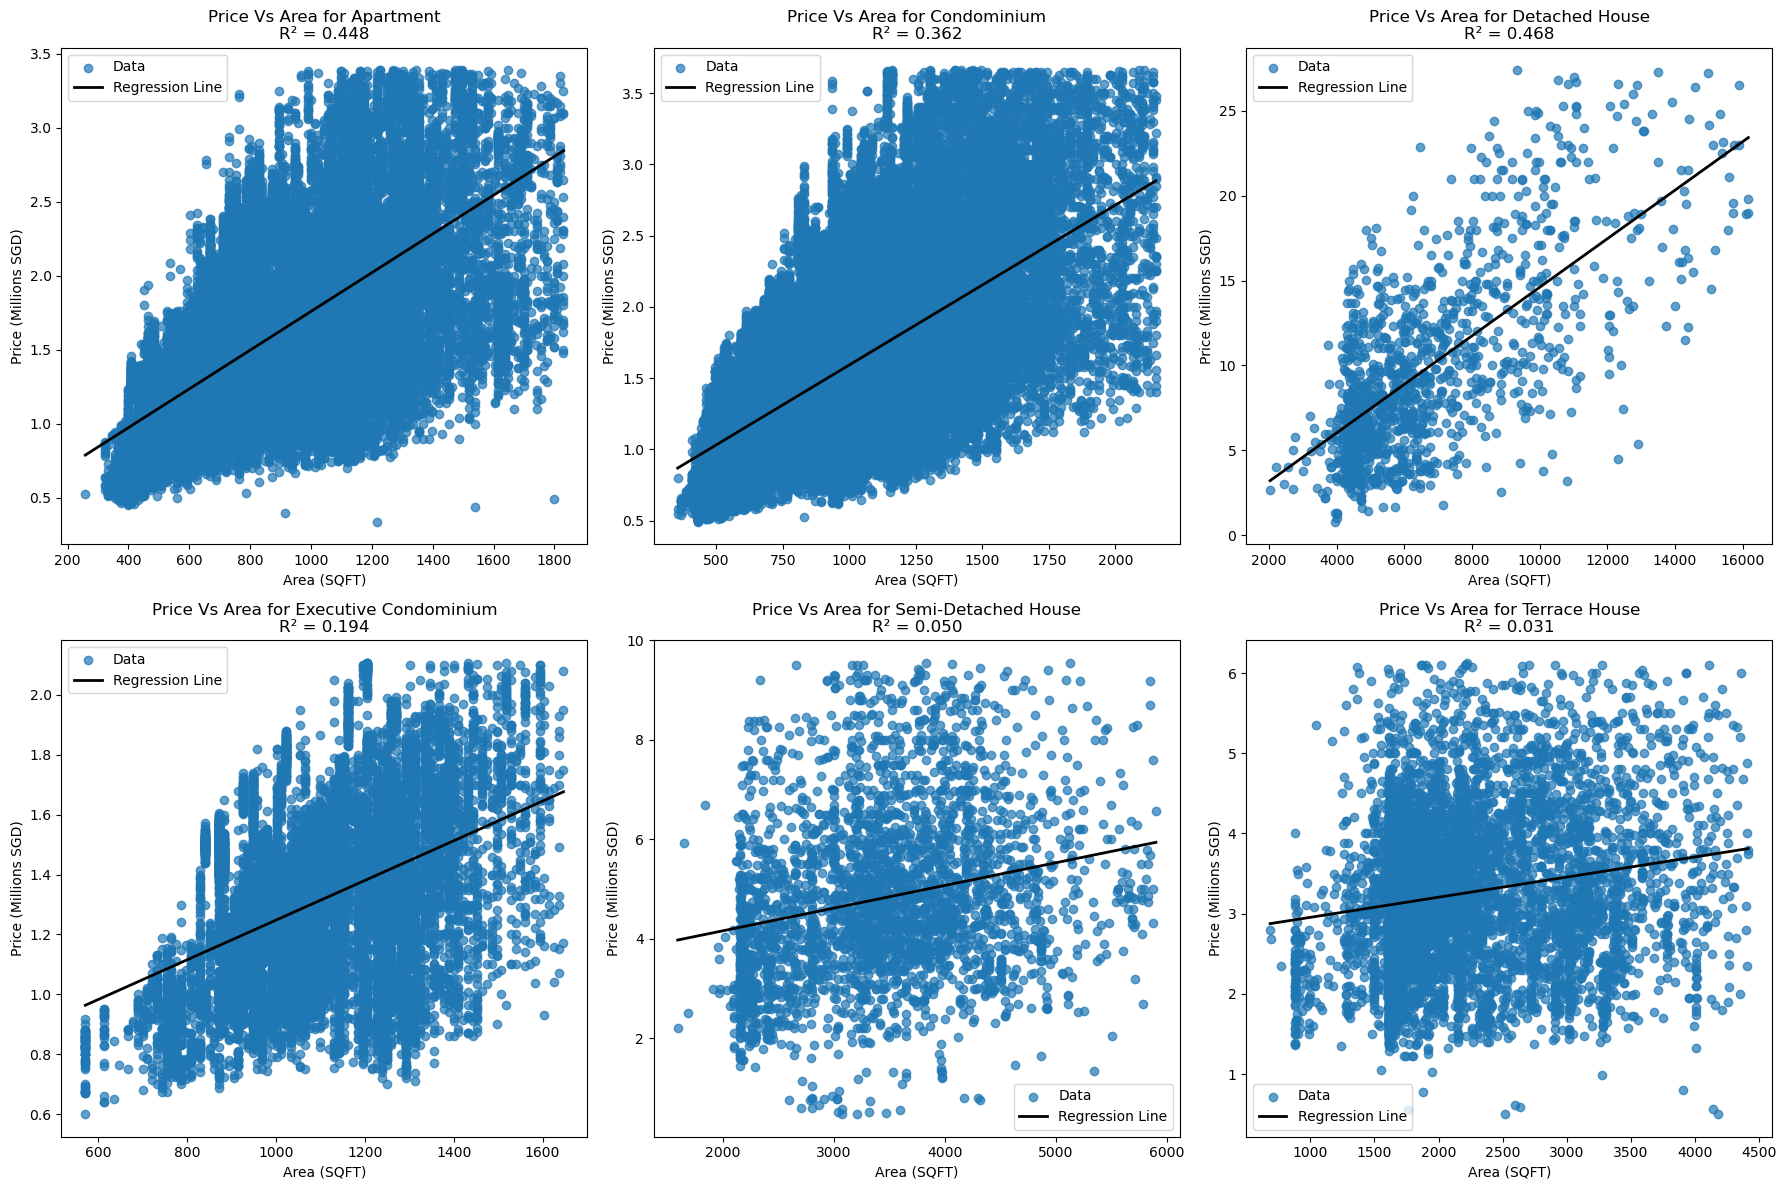


R² Scores for Each Property Type:
Apartment: R² = 0.4481
Condominium: R² = 0.3619
Detached House: R² = 0.4679
Executive Condominium: R² = 0.1937
Semi-Detached House: R² = 0.0500
Terrace House: R² = 0.0314


In [15]:

# Define property types to analyze
property_types = [
    "Apartment", "Condominium", "Detached House",
    "Executive Condominium", "Semi-Detached House", "Terrace House"
]
r2_scores = {} 
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array

for i, prop_type in enumerate(property_types):
    df1 = df[df['Property Type'] == prop_type].copy()

    # Remove outliers
    df1_filtered = df1.copy()
    df1_filtered['Price'] = removeoutlier(df1_filtered['Price'])
    df1_filtered['Area (SQFT)'] = removeoutlier(df1_filtered['Area (SQFT)'])
    
    # Drop rows with NaN in Area and Price
    df1_filtered = df1_filtered.dropna(subset=['Price', 'Area (SQFT)'])

    # Check if enough data remains after outlier removal
    if df1_filtered.shape[0] < 2:
        print(f"Skipping {prop_type} due to insufficient data after cleaning.")
        continue

    # Prepare data
    area = df1_filtered[['Area (SQFT)']]
    price = df1_filtered[['Price']] / 1_000_000  # Convert price to millions

    # Fit Linear Regression model on all data
    linreg = LinearRegression()
    linreg.fit(area, price)

    r2_score = linreg.score(area, price)
    r2_scores[prop_type] = r2_score

    # Predictions for regression line
    area_range = np.linspace(area.min(), area.max(), 100).reshape(-1, 1)
    price_pred = linreg.predict(area_range)

    # Plot scatter and regression line
    ax = axes[i]
    ax.scatter(area, price, label="Data", alpha=0.7)  
    ax.plot(area_range, price_pred, color="black", linewidth=2, label="Regression Line")  

    # Set labels and title
    ax.set_xlabel("Area (SQFT)")
    ax.set_ylabel("Price (Millions SGD)")
    ax.set_title(f"Price Vs Area for {prop_type}\nR² = {r2_score:.3f}")
    ax.legend()

plt.tight_layout()
plt.show()

print("\nR² Scores for Each Property Type:")
for prop_type, r2 in r2_scores.items():
    print(f"{prop_type}: R² = {r2:.4f}")


c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\felic\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

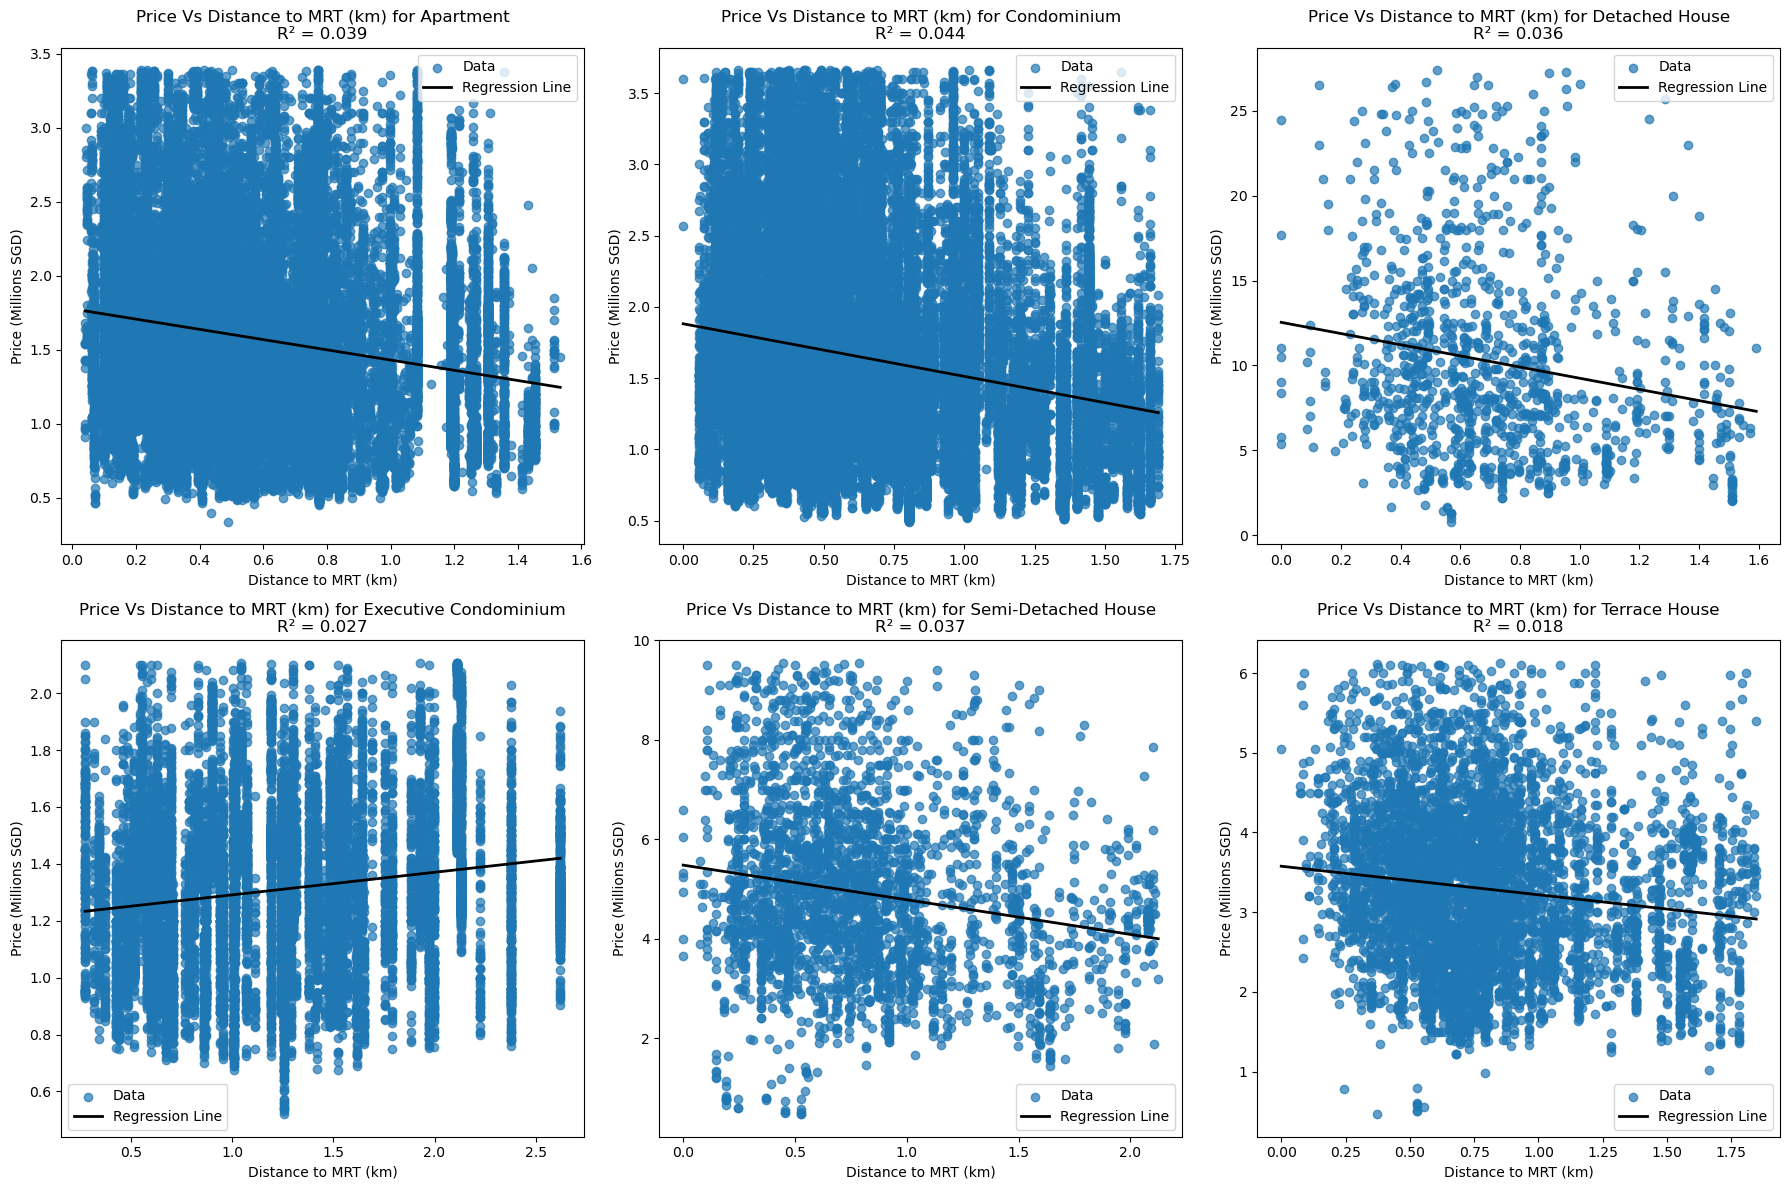


R² Scores for Each Property Type:
Apartment: R² = 0.0385
Condominium: R² = 0.0438
Detached House: R² = 0.0358
Executive Condominium: R² = 0.0270
Semi-Detached House: R² = 0.0375
Terrace House: R² = 0.0176


In [16]:
# MRT
# Define property types to analyze
property_types = [
    "Apartment", "Condominium", "Detached House",
    "Executive Condominium", "Semi-Detached House", "Terrace House"
]
r2_scores = {} 
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array

for i, prop_type in enumerate(property_types):
    df1 = df[df['Property Type'] == prop_type].copy()

    # Remove outliers
    df1_filtered = df1.copy()
    df1_filtered['Price'] = removeoutlier(df1_filtered['Price'])
    df1_filtered['Distance to MRT (km)'] = removeoutlier(df1_filtered['Distance to MRT (km)'])
    
    # Drop rows with NaN in Area and Price
    df1_filtered = df1_filtered.dropna(subset=['Price', 'Distance to MRT (km)'])

    # Check if enough data remains after outlier removal
    if df1_filtered.shape[0] < 2:
        print(f"Skipping {prop_type} due to insufficient data after cleaning.")
        continue

    # Prepare data
    area = df1_filtered[['Distance to MRT (km)']]
    price = df1_filtered[['Price']] / 1_000_000  # Convert price to millions

    # Fit Linear Regression model on all data
    linreg = LinearRegression()
    linreg.fit(area, price)

    r2_score = linreg.score(area, price)
    r2_scores[prop_type] = r2_score

    # Predictions for regression line
    area_range = np.linspace(area.min(), area.max(), 100).reshape(-1, 1)
    price_pred = linreg.predict(area_range)

    # Plot scatter and regression line
    ax = axes[i]
    ax.scatter(area, price, label="Data", alpha=0.7)  
    ax.plot(area_range, price_pred, color="black", linewidth=2, label="Regression Line")  

    # Set labels and title
    ax.set_xlabel("Distance to MRT (km)")
    ax.set_ylabel("Price (Millions SGD)")
    ax.set_title(f"Price Vs Distance to MRT (km) for {prop_type}\nR² = {r2_score:.3f}")
    ax.legend()

plt.tight_layout()
plt.show()

print("\nR² Scores for Each Property Type:")
for prop_type, r2 in r2_scores.items():
    print(f"{prop_type}: R² = {r2:.4f}")


In [17]:
mrt = pd.DataFrame(df['Distance to MRT (km)'])
mrt.describe()

,Distance to MRT (km)
count,"128,349.0000"
mean,0.7651
std,0.5620
min,0.0000
25%,0.3660
50%,0.6089
75%,1.0159
max,3.3808


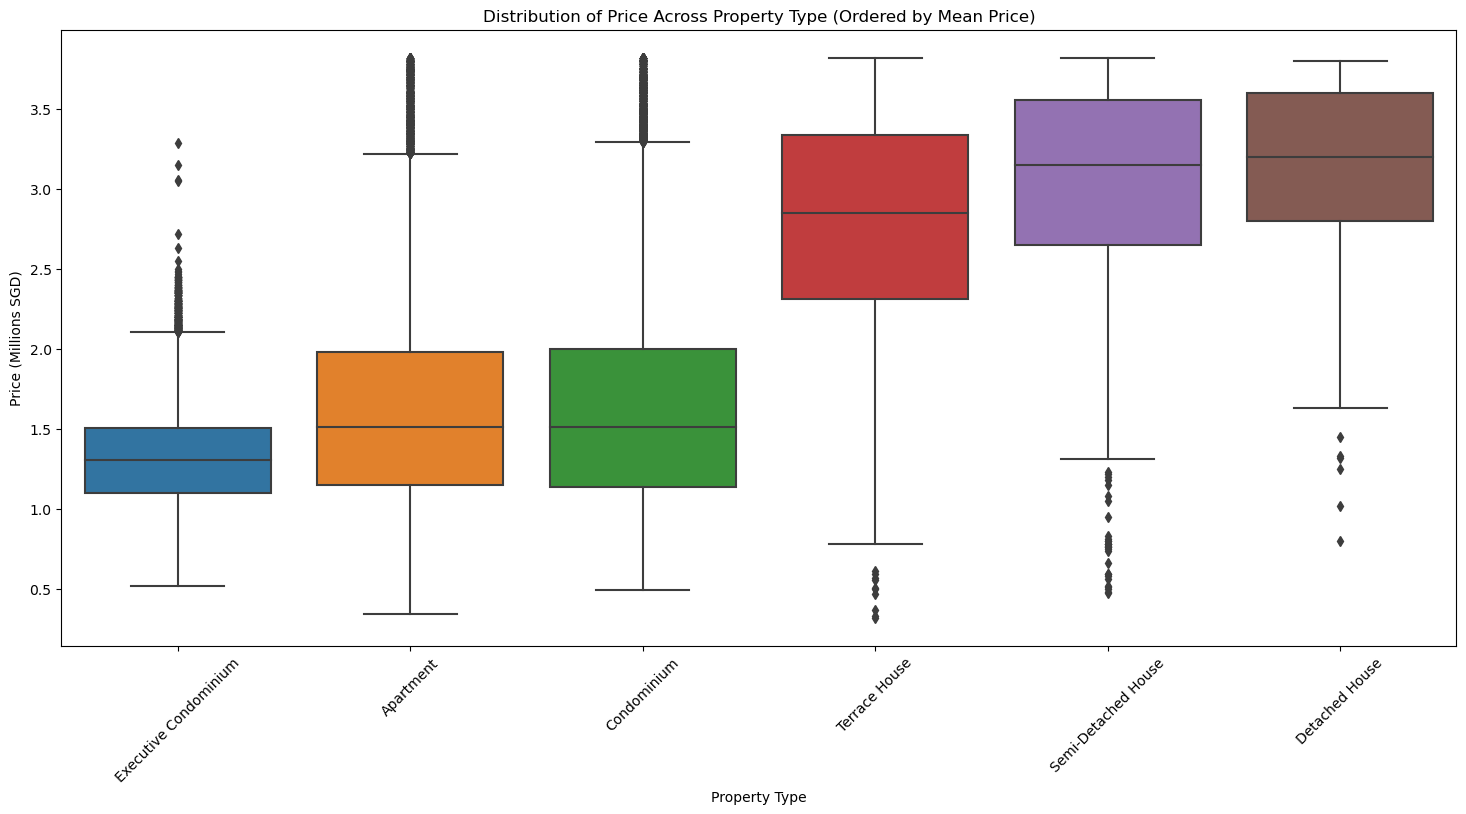

In [18]:
# Remove outliers from Price
df_filtered = df.copy()
df_filtered['Price'] = removeoutlier(df_filtered['Price'])

# Drop rows with NaN values in Price and Property Type
df_filtered = df_filtered.dropna(subset=['Price', 'Property Type'])

# Convert Property Type to string for categorical plotting
df_filtered['Property Type'] = df_filtered['Property Type'].astype(str)

# Convert Price to millions
df_filtered['Price_Million'] = df_filtered['Price'] / 1_000_000

# Calculate mean prices per property type and sort them
district_order = df_filtered.groupby("Property Type")["Price_Million"].mean().sort_values().index

# Set figure size
plt.figure(figsize=(18, 8))

# Create boxplot, ordered by mean price (in millions)
sb.boxplot(x='Property Type', y='Price_Million', data=df_filtered, order=district_order)

# Customize labels and title
plt.xlabel("Property Type")
plt.ylabel("Price (Millions SGD)")
plt.title("Distribution of Price Across Property Type (Ordered by Mean Price)")

# Rotate property type labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


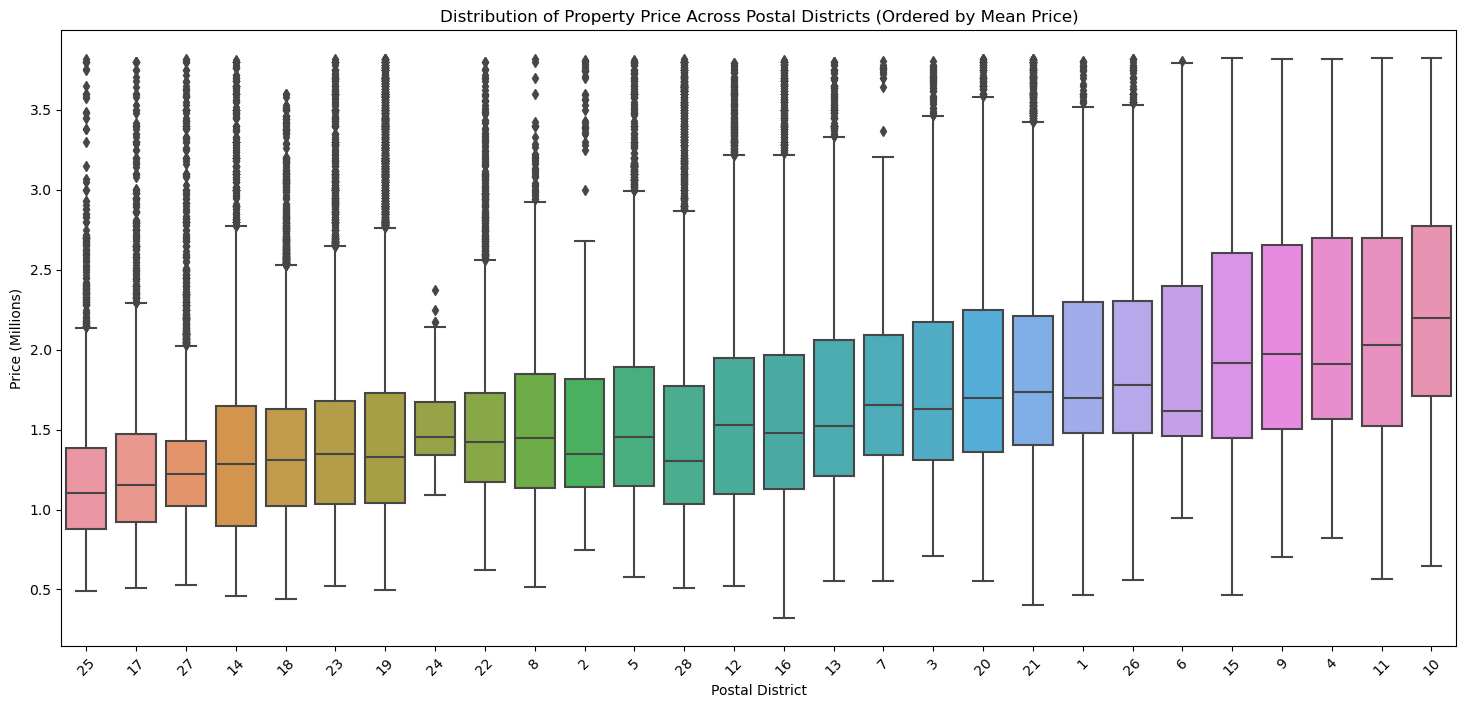

In [19]:
# Remove outliers from Price
df_filtered = df.copy()
df_filtered['Price'] = removeoutlier(df_filtered['Price'])

# Drop rows with NaN values in Price and Postal District
df_filtered = df_filtered.dropna(subset=['Price', 'Postal District'])

# Convert Postal District to string for categorical plotting
df_filtered['Postal District'] = df_filtered['Postal District'].astype(str)

# Calculate mean prices per district and sort them
district_order = df_filtered.groupby("Postal District")["Price"].mean().sort_values().index
df_filtered['Price_Million'] = df_filtered['Price'] / 1_000_000

# Set figure size
plt.figure(figsize=(18, 8))

# Create boxplot, ordered by mean price
sb.boxplot(x='Postal District', y='Price_Million', data=df_filtered, order=district_order)

# Customize labels and title
plt.xlabel("Postal District")
plt.ylabel("Price (Millions)")
plt.title("Distribution of Property Price Across Postal Districts (Ordered by Mean Price)")

# Rotate district labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


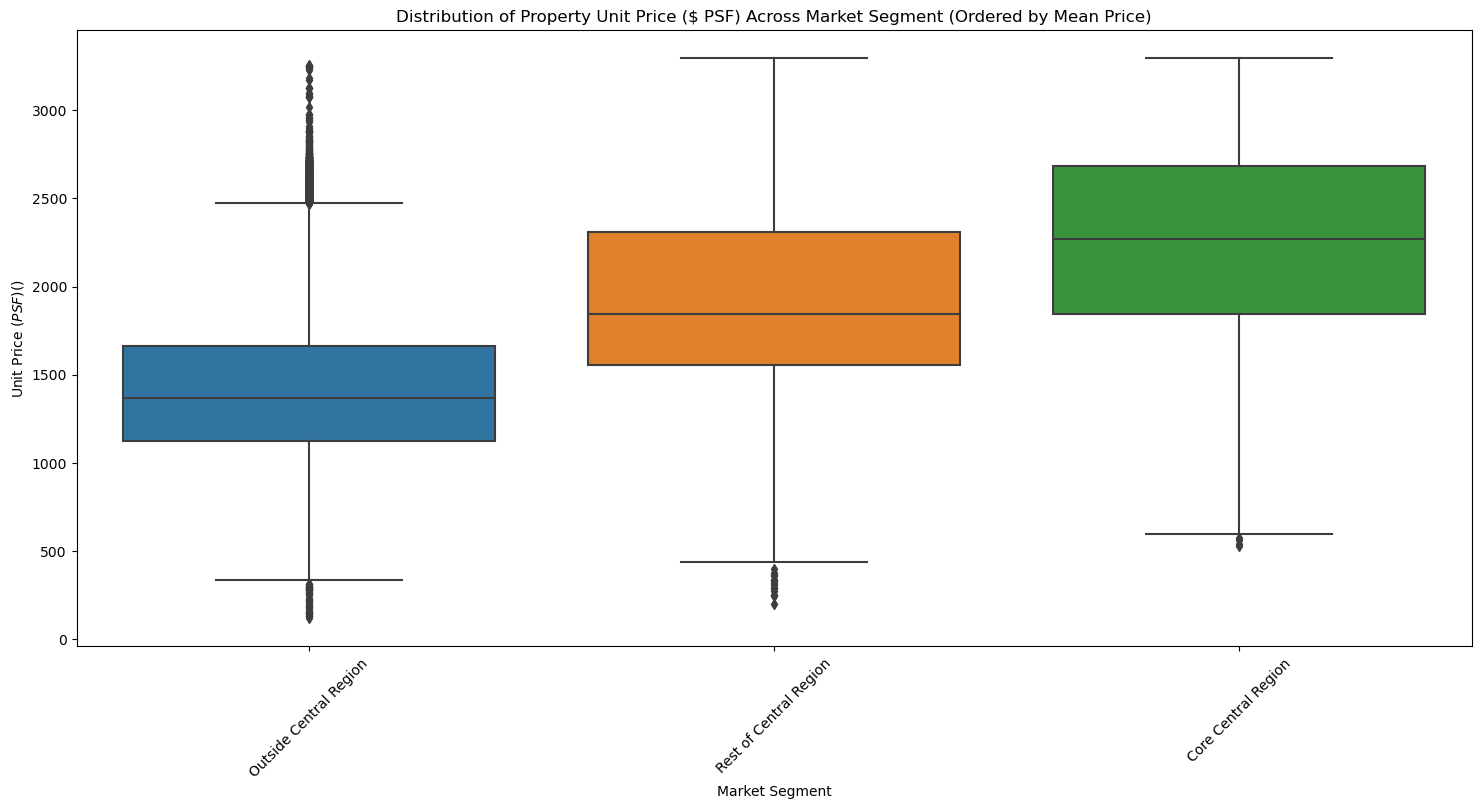

In [125]:
# Remove outliers from Price
df_filtered = df.copy()
df_filtered['Unit Price ($ PSF)'] = removeoutlier(df_filtered['Unit Price ($ PSF)'])

# Drop rows with NaN values in Price and Postal District
df_filtered = df_filtered.dropna(subset=['Unit Price ($ PSF)', 'Market Segment'])

# Convert Postal District to string for categorical plotting
df_filtered['Market Segment'] = df_filtered['Market Segment'].astype(str)

# Calculate mean prices per district and sort them
district_order = df_filtered.groupby("Market Segment")["Unit Price ($ PSF)"].mean().sort_values().index

# Set figure size
plt.figure(figsize=(18, 8))

# Create boxplot, ordered by mean price
sb.boxplot(x='Market Segment', y='Unit Price ($ PSF)', data=df_filtered, order=district_order)

# Customize labels and title
plt.xlabel("Market Segment")
plt.ylabel("Unit Price ($ PSF)")
plt.title("Distribution of Property Unit Price ($ PSF) Across Market Segment (Ordered by Mean Price)")

# Rotate district labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

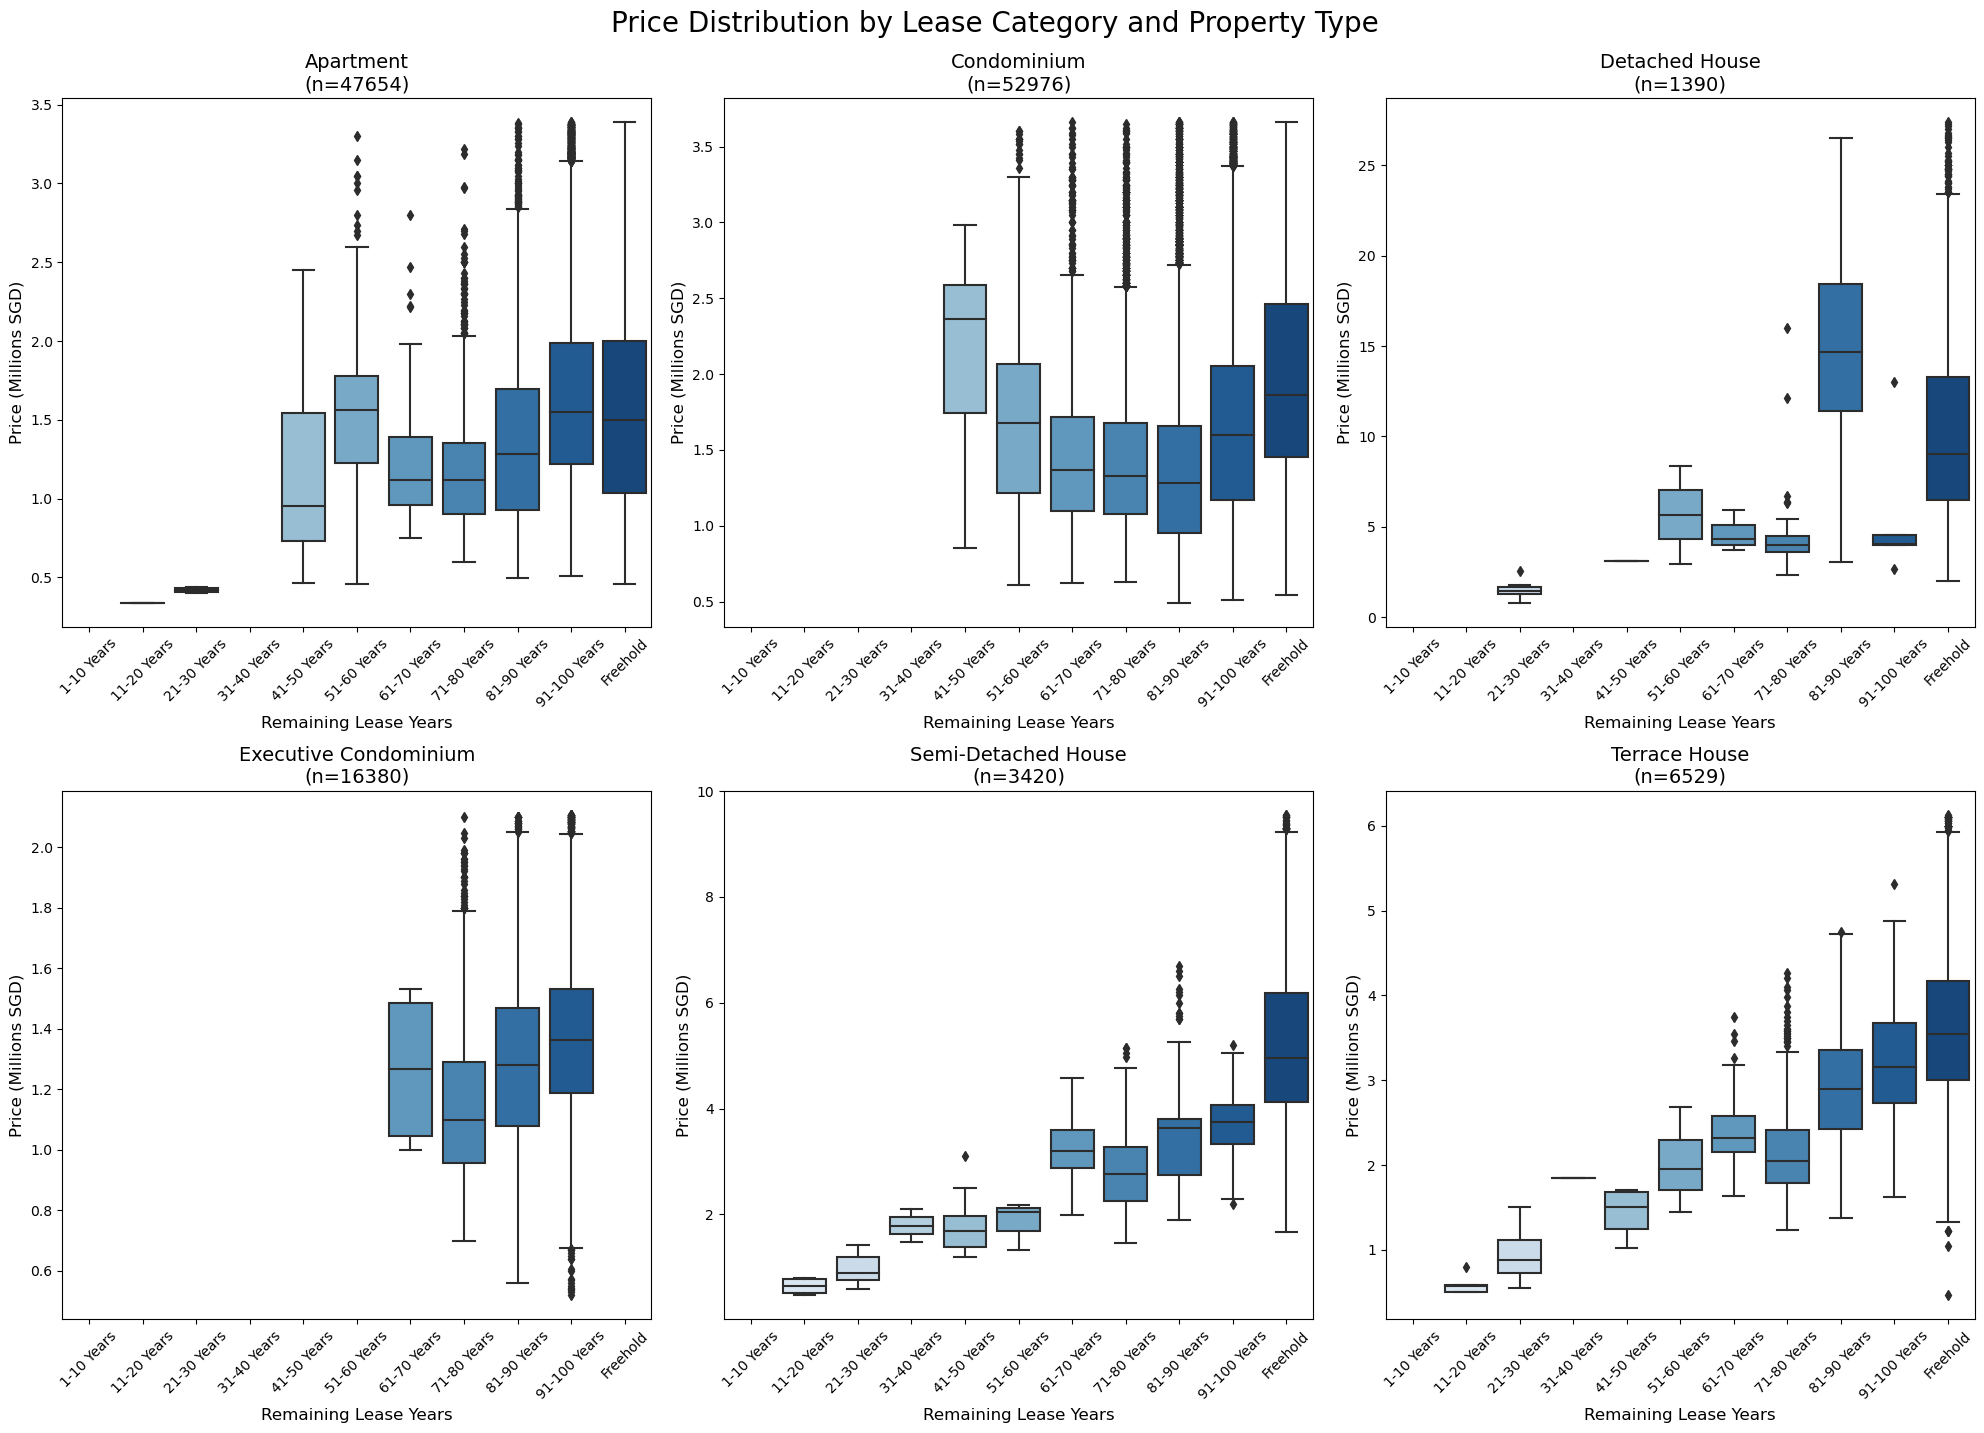

In [23]:
# Define property types to analyze
property_types = [
    "Apartment", "Condominium", "Detached House",
    "Executive Condominium", "Semi-Detached House", "Terrace House"
]

lease_bin_order = [
    "1-10 Years", "11-20 Years", "21-30 Years", "31-40 Years", "41-50 Years",
    "51-60 Years", "61-70 Years", "71-80 Years", "81-90 Years", "91-100 Years", "Freehold"
]

# Create a figure with 2 rows, 3 columns (for 6 property types)
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
axes = axes.flatten()  # Flatten the 2x3 array for easier indexing

# For each property type
for i, prop_type in enumerate(property_types):
    # Filter data for this property type
    df_filtered = df[df['Property Type'] == prop_type].copy()
    
    # Check if enough data exists
    if len(df_filtered) < 5:
        axes[i].text(0.5, 0.5, f"Insufficient data for {prop_type}", 
                    ha='center', va='center', fontsize=14)
        axes[i].set_title(prop_type)
        continue
    
    # Remove price outliers for better visualization
    df_filtered['Price'] = removeoutlier(df_filtered['Price'])
    df1_filtered = df1_filtered.dropna(subset=['Price'])
    df_filtered['Price'] = df_filtered['Price'] / 1_000_000  # Convert to millions
    
    # Create the boxplot
    sb.boxplot(
        x='Lease_Category',          # Your binned lease years column
        y='Price',                   # Price column
        order=lease_bin_order,
        data=df_filtered,
        ax=axes[i],
        palette='Blues'              # Use a blue color palette for visual appeal
    )
    
    # # Calculate median price for each lease category to annotate
    # medians = df_filtered.groupby('Lease_Category')['Price'].median()
    
    # # Add median values as text on each box
    # for j, (category, median) in enumerate(medians.items()):
    #     axes[i].text(
    #         j, median, f'{median:.2f}M',
    #         ha='center', va='bottom',
    #         fontsize=9, color='darkblue'
    #     )
    
    # Customize the plot
    axes[i].set_title(f"{prop_type}", fontsize=14)
    axes[i].set_xlabel("Remaining Lease Years", fontsize=12)
    axes[i].set_ylabel("Price (Millions SGD)", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability
    
    # Add count of properties in each category as subtitle
    counts = df_filtered['Lease_Category'].value_counts().sum()
    axes[i].set_title(f"{prop_type}\n(n={counts})", fontsize=14)

# Adjust layout
plt.tight_layout()

# Add a common title for the entire figure
fig.suptitle('Price Distribution by Lease Category and Property Type', 
            fontsize=20, y=1.02)

plt.show()
